In [1]:
import pandas as pd
pd.set_option('future.no_silent_downcasting', True)
dataset=pd.read_csv('dataset2.csv')

In [2]:
dataset.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
###THIS SECTION IS DATASET SPECIFIC PROCESSING

###THIS SECTION IS DATASET SPECIFIC PROCESSING


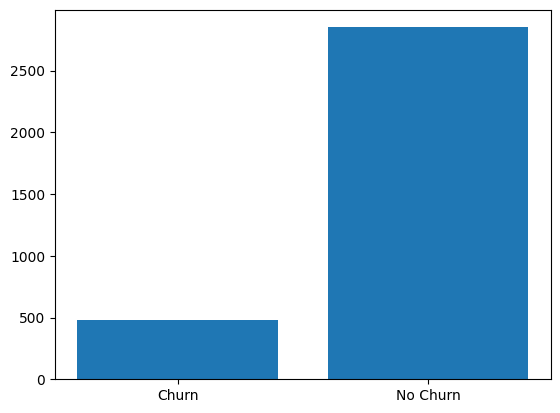

In [4]:
from pre_processor import PreProcessor


label_column = 'Churn'
pre_processor = PreProcessor(dataset)
pre_processor.rename_label(label_column).split_features_labels().plot_imbalance()
   

In [5]:
binary_encode_columns=[]
one_hot_encode_columns=[]
ordinal_encode_columns=[]
scaling_columns=[column for column in dataset.columns if column != label_column]


In [6]:
scaling_columns

['AccountWeeks',
 'ContractRenewal',
 'DataPlan',
 'DataUsage',
 'CustServCalls',
 'DayMins',
 'DayCalls',
 'MonthlyCharge',
 'OverageFee',
 'RoamMins']

In [7]:

pre_processor.\
    remove_nans().\
    remove_duplicates().\
    scale(scaling_columns).\
    binary_encode(binary_encode_columns).\
    onehot_encode(one_hot_encode_columns).\
    ordinal_encode(ordinal_encode_columns).\
    oversample()
    

In [8]:
pre_processor.dataset

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins,churn
0,0.676489,0.327580,1.617086,1.480204,-0.427932,1.566767,0.476643,1.990727,-0.071584,-0.085008,0.0
1,0.149065,0.327580,1.617086,2.266072,-0.427932,-0.333738,1.124503,1.564510,-0.107082,1.240482,0.0
2,0.902529,0.327580,-0.618396,-0.641642,-1.188218,1.168304,0.675985,-0.262133,-1.574346,0.703121,0.0
3,-0.428590,-3.052685,-0.618396,-0.641642,0.332354,2.196596,-1.466936,0.042307,-2.741846,-1.303026,0.0
4,-0.654629,-3.052685,-0.618396,-0.641642,1.092641,-0.240090,0.626149,-0.931902,-1.037927,-0.049184,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5695,0.249527,0.327580,-0.618396,-0.641642,1.852927,-0.866246,1.224174,-0.871014,0.397783,0.882241,1.0
5696,-0.629514,-3.052685,-0.618396,-0.641642,-1.188218,1.230736,0.476643,0.224972,0.105908,1.061361,1.0
5697,-0.001628,0.327580,-0.618396,-0.641642,2.613214,-1.653992,0.875326,-1.114567,1.166913,1.168834,1.0
5698,-0.579283,-3.052685,-0.618396,-0.641642,-0.427932,1.047112,2.021539,0.407636,1.269464,-0.264128,1.0


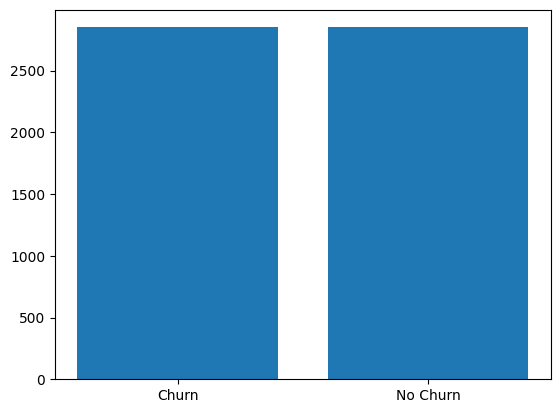

In [9]:
pre_processor.plot_imbalance()

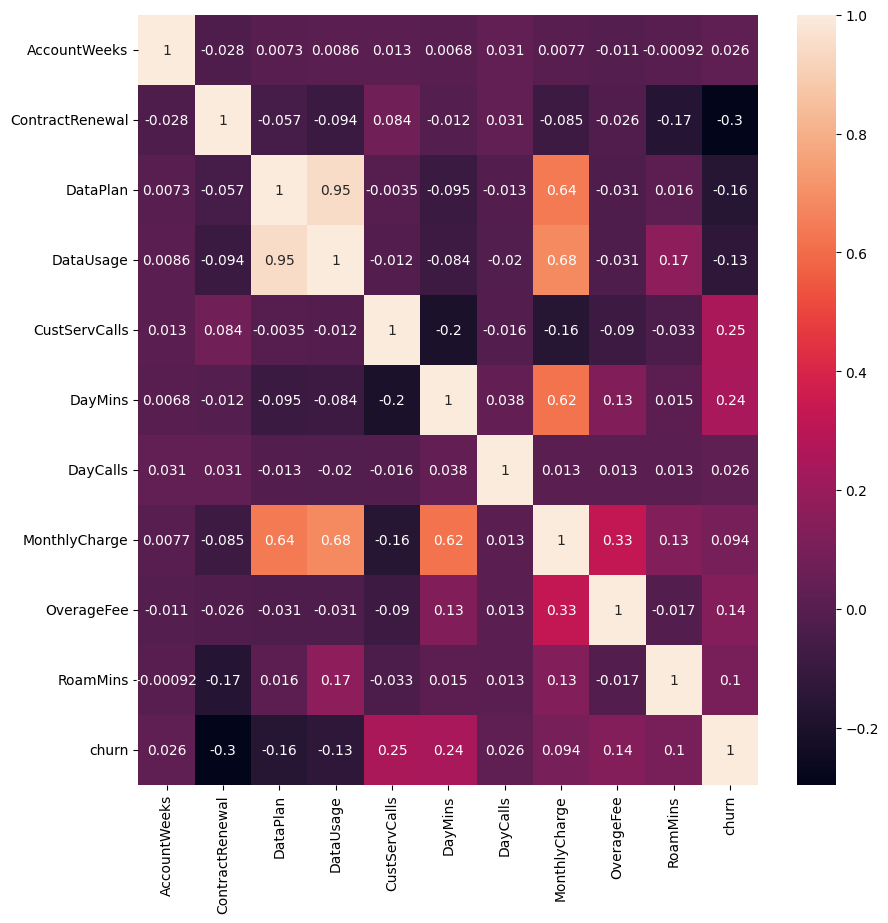

In [10]:
pre_processor.plot_correlation()

In [11]:
pre_processor.dataset.drop(columns=['DataUsage'],inplace=True)

In [12]:
pre_processor.calculate_feature_importance()

,importance
DayMins,0.203340
CustServCalls,0.181583
MonthlyCharge,0.149118
ContractRenewal,0.113664
OverageFee,0.098023
RoamMins,0.081019
DayCalls,0.066036
AccountWeeks,0.063158
DataPlan,0.044059


In [13]:
pre_processor.remove_features_by_importance(0.00)

In [14]:
pre_processor.split_features_labels()

In [15]:
pre_processor.calculate_feature_importance()

,importance
DayMins,0.195609
CustServCalls,0.184961
MonthlyCharge,0.152085
ContractRenewal,0.111009
OverageFee,0.095229
RoamMins,0.083660
AccountWeeks,0.065025
DayCalls,0.063301
DataPlan,0.049120


In [16]:
X_train,X_test,y_train,y_test = pre_processor.train_test_split()

In [17]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=5)
# pca.fit(X_train)
# X_train = pca.transform(X_train)
# X_test = pca.transform(X_test)


In [18]:
from train_setup import Model_selection

model_select=Model_selection()

model_select.train(X_train,y_train,X_test,y_test,n_trials_=2)

[I 2024-06-11 11:18:12,997] A new study created in memory with name: no-name-c5be5bc8-fa87-428c-9e0b-618e30f8c5fe
[I 2024-06-11 11:18:15,211] Trial 0 finished with value: 0.9182017543859649 and parameters: {'n_estimators': 112, 'max_depth': 14, 'min_samples_split': 3, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.9182017543859649.
[I 2024-06-11 11:18:18,849] Trial 1 finished with value: 0.9133771929824561 and parameters: {'n_estimators': 183, 'max_depth': 27, 'min_samples_split': 3, 'min_samples_leaf': 8}. Best is trial 0 with value: 0.9182017543859649.
[I 2024-06-11 11:18:18,849] A new study created in memory with name: no-name-f1126606-faaf-4f86-8680-cdb248b5b8de
[I 2024-06-11 11:18:20,208] Trial 0 finished with value: 0.8322368421052632 and parameters: {'num_layers': 1, 'layer1_size': 45, 'layer2_size': 51, 'activation': 'tanh', 'solver': 'adam', 'alpha': 0.06988250892811751}. Best is trial 0 with value: 0.8322368421052632.
[I 2024-06-11 11:18:23,580] Trial 1 finished with v

In [19]:
model_select.classification_reports()

Random Forest
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93       547
         1.0       0.93      0.95      0.94       593

    accuracy                           0.94      1140
   macro avg       0.94      0.94      0.94      1140
weighted avg       0.94      0.94      0.94      1140

Neural Network
              precision    recall  f1-score   support

         0.0       0.87      0.86      0.87       547
         1.0       0.87      0.88      0.88       593

    accuracy                           0.87      1140
   macro avg       0.87      0.87      0.87      1140
weighted avg       0.87      0.87      0.87      1140

Gradient Boosting
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98       547
         1.0       0.96      0.99      0.98       593

    accuracy                           0.98      1140
   macro avg       0.98      0.98      0.98      1140
weighted avg       0.98    

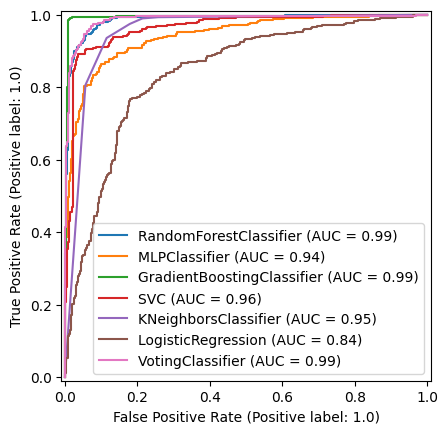

In [20]:
model_select.roc_curve()

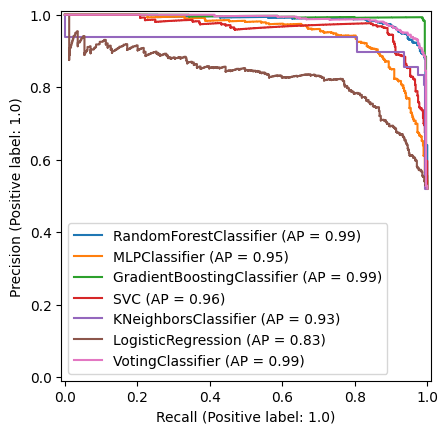

In [21]:
model_select.precision_recall_curve()